In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집화
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# 시간 측정을 위한 시간 모듈
import datetime
# 주식 정보를 읽어오기 위한 라이브러리
from pandas_datareader import data

### 데이터 읽어오기

In [2]:
chipo = pd.read_csv("data/chipotle.tsv", sep="\t")
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [3]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [4]:
chipo.isna().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

### 요약 통계 정보

In [6]:
# 숫자 데이터에 대한 요약 통계 정보
chipo.describe()
chipo[ ["order_id", "quantity"] ].describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [9]:
# 문자열 칼럼도 요약통계가 가능함.
# 대신 카테고리형만 가능
chipo[ ["item_name", "choice_description", "item_price"] ].describe()

,item_name,choice_description,item_price
count,4622,3376,4622
unique,50,1043,78
top,Chicken Bowl,[Diet Coke],$8.75
freq,726,134,730


### 카테고리형 데이터의 데이터 종류

In [17]:
chipo["item_name"].value_counts().index # 중복 없음.

Index(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole',
       'Steak Burrito', 'Canned Soft Drink', 'Chips', 'Steak Bowl',
       'Bottled Water', 'Chicken Soft Tacos', 'Chicken Salad Bowl',
       'Chips and Fresh Tomato Salsa', 'Canned Soda', 'Side of Chips',
       'Veggie Burrito', 'Barbacoa Burrito', 'Veggie Bowl', 'Carnitas Bowl',
       'Barbacoa Bowl', 'Carnitas Burrito', 'Steak Soft Tacos',
       '6 Pack Soft Drink', 'Chips and Tomatillo Red Chili Salsa',
       'Chicken Crispy Tacos', 'Chips and Tomatillo Green Chili Salsa',
       'Carnitas Soft Tacos', 'Steak Crispy Tacos',
       'Chips and Tomatillo-Green Chili Salsa', 'Steak Salad Bowl',
       'Nantucket Nectar', 'Barbacoa Soft Tacos',
       'Chips and Roasted Chili Corn Salsa', 'Izze',
       'Chips and Tomatillo-Red Chili Salsa', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa', 'Barbacoa Crispy Tacos',
       'Barbacoa Salad Bowl', 'Chicken Salad', 'Carnitas Crispy Tacos',
       'Veggie S

In [15]:
len(chipo["item_name"].value_counts().index)  # 중복 없음.

50

In [14]:
len(chipo["item_name"].unique())

50

이 식당의 음식 종류는 총 50개이다. 

### 가장 많이 주문한 음식은?

In [23]:
# 상품 이름 별로 몇 개가 저장되어 있는지 값을 불러온다.
chipo["item_name"].value_counts().index[0], chipo["item_name"].value_counts()[0] 

('Chicken Bowl', 726)

In [24]:
a1 = chipo["item_name"].value_counts()
print(f"가장 많이 주문한 음식 : {a1.index[0]}\n갯수 \t\t:{a1[0]}")

가장 많이 주문한 음식 : Chicken Bowl
갯수 		:726


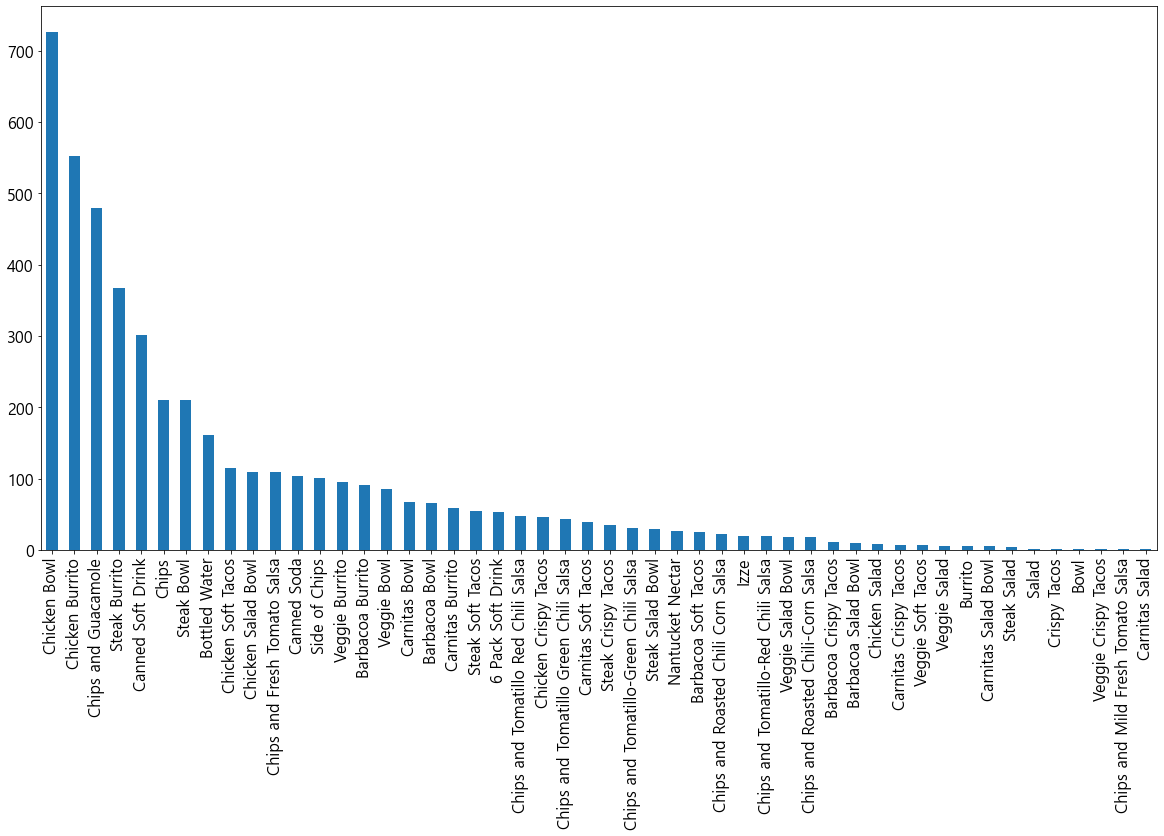

In [26]:
a1.plot.bar()
plt.show()

### item_name 당 주문 개수와 총량을 구한다.

In [59]:
# item 당 주문 개수를 가져온다.
order_count = chipo.groupby("item_name")["order_id"].count().sort_values(ascending=False)

In [61]:
# 아이템당 주문 총량을 구한다.
item_quantity = chipo.groupby("item_name")["quantity"].sum().sort_values(ascending=False)

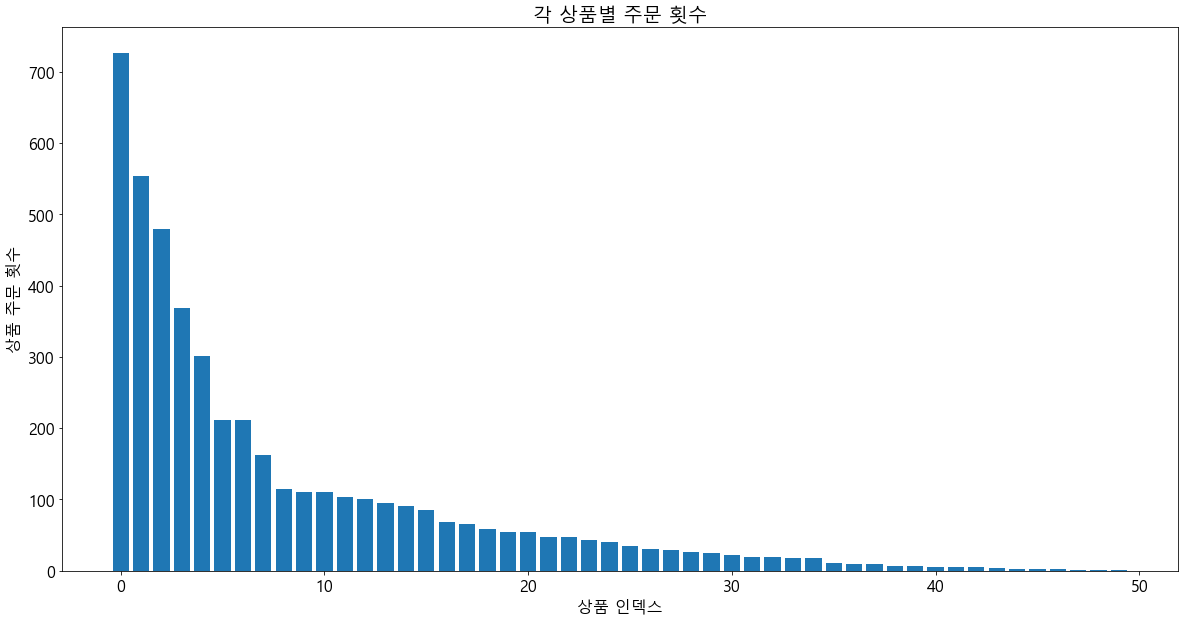

In [75]:
# 각 상품별 주문 횟수
len(order_count.values)
# x축 상품의 개수만큼 값이 들어있는 range
x = np.arange(len(order_count.values))
# 상품별 주문 횟수

plt.bar(x, order_count.values, align="center")
plt.xlabel("상품 인덱스")
plt.ylabel("상품 주문 횟수")
plt.title("각 상품별 주문 횟수")
plt.show()

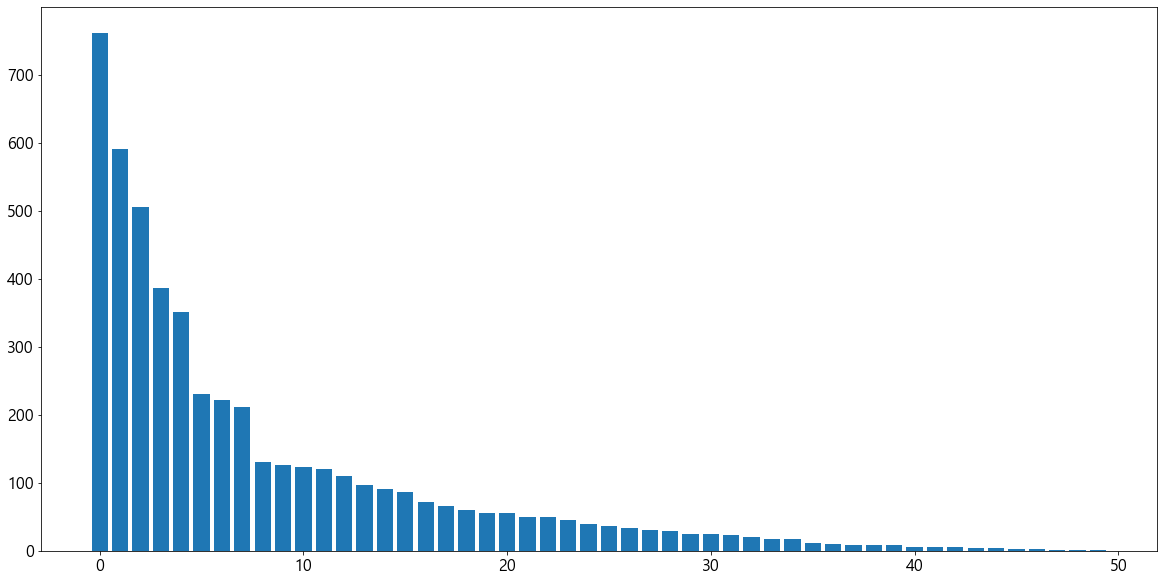

In [87]:
# 주문 상품 총 개수. 총 몇개를 팔았나.
x = np.arange(len(item_quantity.values))

plt.bar(x, item_quantity.values)
plt.show()

In [93]:
df1 = pd.DataFrame({
    "주문횟수가 가장 많은 상품 10개" : order_count.head(10).index,
    "주문 횟수" : order_count.head(10).values,
    "주문개수가 가장 많은 상품 10개" : quantity_count.head(10).index,
    "주문개수" : quantity_count.head(10).values
    
})
df1

,주문횟수가 가장 많은 상품 10개,주문 횟수,주문개수가 가장 많은 상품 10개,주문개수
0,Chicken Bowl,726,Chicken Bowl,761
1,Chicken Burrito,553,Chicken Burrito,591
2,Chips and Guacamole,479,Chips and Guacamole,506
3,Steak Burrito,368,Steak Burrito,386
4,Canned Soft Drink,301,Canned Soft Drink,351
5,Steak Bowl,211,Chips,230
6,Chips,211,Steak Bowl,221
7,Bottled Water,162,Bottled Water,211
8,Chicken Soft Tacos,115,Chips and Fresh Tomato Salsa,130
9,Chicken Salad Bowl,110,Canned Soda,126


- 주문 당 평균 계산 금액 출력
- 한 주문에 10달러 이상 사용한 주문의 id를 출력한다.
- 각 아이템의 가격 구하기
- 가장 비싼 주문에서 item이 몇 개 팔렸는ㄴ지
- 'Veggie Salad Bowl"이 몇 번 주문 되었는지
- " Chicken Bowl"을 2개 이상 주문한 주문 횟수 구하기

In [101]:
list(chipo.groupby("order_id"))

[(1,
     order_id  quantity                              item_name  \
  0         1         1           Chips and Fresh Tomato Salsa   
  1         1         1                                   Izze   
  2         1         1                       Nantucket Nectar   
  3         1         1  Chips and Tomatillo-Green Chili Salsa   
  
    choice_description item_price  
  0                NaN     $2.39   
  1       [Clementine]     $3.39   
  2            [Apple]     $3.39   
  3                NaN     $2.39   ),
 (2,
     order_id  quantity     item_name  \
  4         2         2  Chicken Bowl   
  
                                    choice_description item_price  
  4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...    $16.98   ),
 (3,
     order_id  quantity      item_name  \
  5         3         1   Chicken Bowl   
  6         3         1  Side of Chips   
  
                                    choice_description item_price  
  5  [Fresh Tomato Salsa (Mild), [Rice, Cheese, So

In [114]:
chipo["item_price"] = chipo["item_price"].str.replace("$","")
chipo["item_price"] = chipo["item_price"].str.strip()
chipo["item_price"] = chipo["item_price"].astype("float64")


AttributeError: Can only use .str accessor with string values!

In [115]:
chipo["item_price"].dtype

dtype('float64')

In [120]:
result = chipo.groupby("order_id")["item_price"].mean().sort_values(ascending=False)

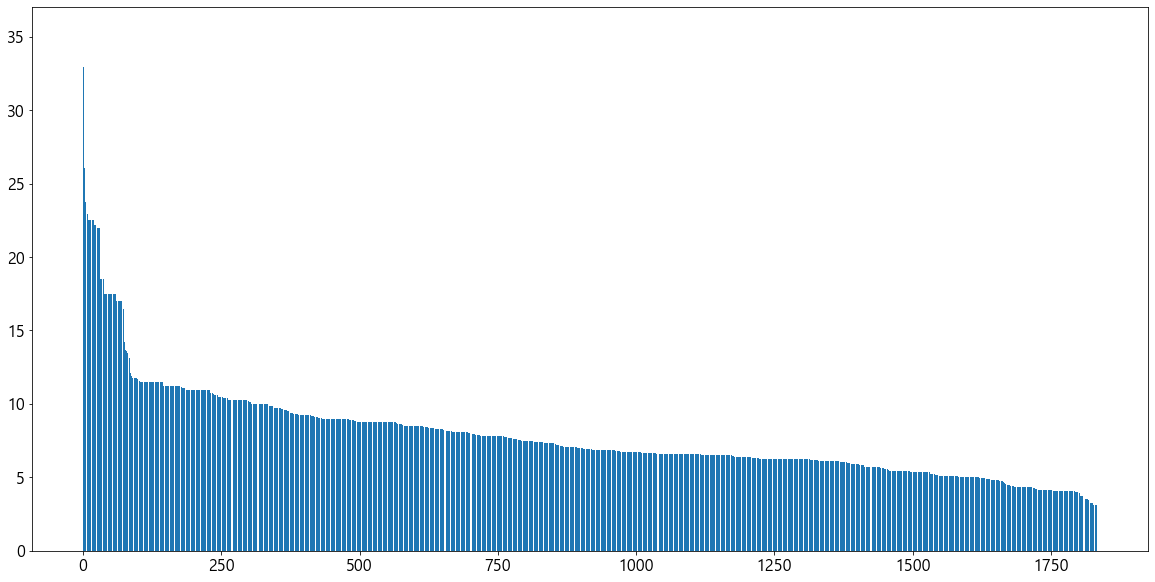

In [121]:
# 시각화
x = np.arange(len(result))

plt.bar(x, result)
plt.show()

In [122]:
result

order_id
1398    35.25
178     32.94
616     26.25
1336    26.07
123     23.78
        ...  
1009     3.09
1578     3.09
1117     3.09
1201     3.09
1        2.89
Name: item_price, Length: 1834, dtype: float64

In [123]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


In [154]:
a = chipo.groupby("order_id")["item_price"].sum()[chipo.groupby("order_id")["item_price"].sum() > 10].index 
a

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834],
           dtype='int64', name='order_id', length=1834)

In [160]:
list(chipo.groupby("item_name")[["quantity","item_price"]])

[('6 Pack Soft Drink',
        order_id  quantity          item_name choice_description  item_price
  298        129         1  6 Pack Soft Drink           [Sprite]        6.49
  341        148         1  6 Pack Soft Drink        [Diet Coke]        6.49
  357        154         1  6 Pack Soft Drink             [Coke]        6.49
  388        168         1  6 Pack Soft Drink        [Diet Coke]        6.49
  417        182         1  6 Pack Soft Drink        [Diet Coke]        6.49
  553        230         1  6 Pack Soft Drink        [Diet Coke]        6.49
  639        264         1  6 Pack Soft Drink        [Diet Coke]        6.49
  721        298         1  6 Pack Soft Drink           [Nestea]        6.49
  743        306         1  6 Pack Soft Drink             [Coke]        6.49
  879        363         1  6 Pack Soft Drink             [Coke]        6.49
  1026       422         1  6 Pack Soft Drink           [Sprite]        6.49
  1051       432         1  6 Pack Soft Drink        